In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
rng = np.random.RandomState(123)
from scipy.stats import multivariate_normal
import seaborn as sns
sns.set_palette("colorblind")
from mind import mind_ensemble

In [3]:
def gen_data(rng, n=200, dim=3, clusters=2):
    scaling = rng.choice([0,5,-5, 10, -10],size=clusters,replace=False)
    C = [np.eye(dim)*0.2 for s in scaling]
    mu = [rng.uniform(size=dim)*s for s in scaling]
    print()
    x = np.zeros((n, dim))
    cluster_ids = np.arange(0,clusters)
    cluster_idx = rng.choice(cluster_ids, size=n, p=1/clusters*np.ones((clusters,)))
    for i in cluster_ids:
        x[cluster_idx==i] = rng.multivariate_normal(mu[i], C[i], size=np.sum(cluster_idx==i))
    return x, cluster_idx

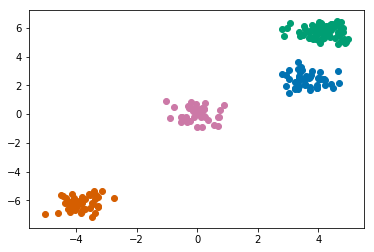

In [4]:
x, cluster_idx = gen_data(rng, clusters=4)
for i in np.unique(cluster_idx):
    plt.scatter(x[cluster_idx==i,0], x[cluster_idx==i,1])